In [13]:
# shows how linear regression analysis can be applied to moore's law
# transistor count from: https://en.wikipedia.org/wiki/Transistor_count

import re
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = []
Y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them
non_decimal = re.compile(r'[^\d]+')

for line in open('Moore\\moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

In [15]:
# Our X and Y to numpy array
X = np.array(X)
Y = np.array(Y)

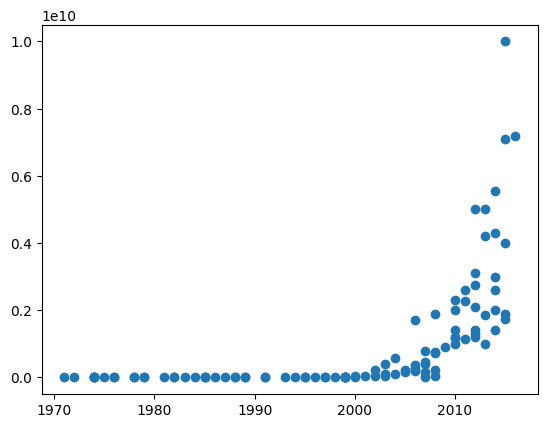

In [16]:
plt.scatter(X, Y)
plt.show()

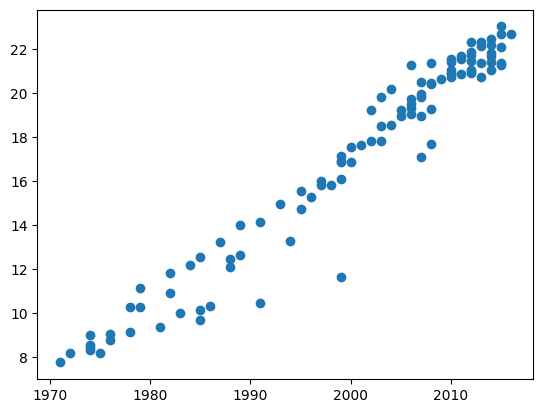

In [17]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [18]:
# apply the equations for linear regressions a, b factors
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

In [19]:
# calculate the predicted Y
Yhat = a*X + b

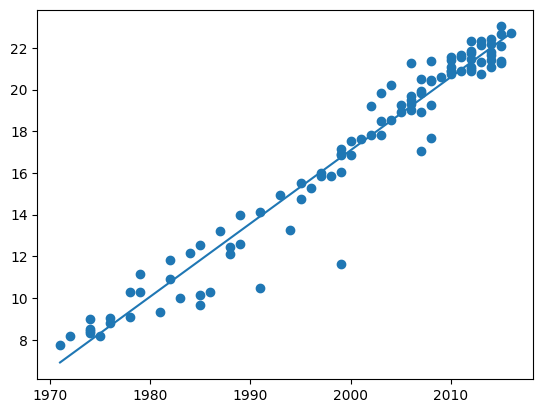

In [20]:
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

In [21]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)

a: 0.35104357336499337 b: -685.0002843816548
the r-squared is: 0.9529442852285758


In [22]:
# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print("time to double:", np.log(2)/a, "years")

time to double: 1.974533172379868 years
